## Taller N.10

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Datos_Animales.csv')
data

,Descripción producto,Clase,Presentación,Especie
0,AFTOGAN 2 ML,VACUNA,"Frascos por 10, 25 y 50 dosis.",Bovinos
1,AFTOGAN RABIA 2ML,VACUNA,"Frascos por 10, 25 y 50 dosis",Bovinos
2,ESTOMATITIS,VACUNA,"Frascos por 10, 20 y 50 dosis",Bovinos
3,VACUNA TRIPLE HA,VACUNA,Frascos por 20 y 50 dosis,Bovinos
4,VACUNA TRIPLE HA,VACUNA,Frascos por 20 y 50 dosis,Ovinos
...,...,...,...,...
218,RABICAN,Vacuna,Frascos por 10 dosis,Felinos
219,IVERCAN,Antiparasitarios interno,Jeringas por 1ml- 2ml -5ml - 10 ml,Caninos
220,NOPICAN,"Pulguicida, garrapaticida, piojicida","Frascos por 0,67mL - 1,34mL - 2,68mL- 4,02 mL",Caninos
221,NOPICAN,"Pulguicida, garrapaticida, piojicida","Frascos por 0,5 mL",Felinos


## Nube de palabras

In [4]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

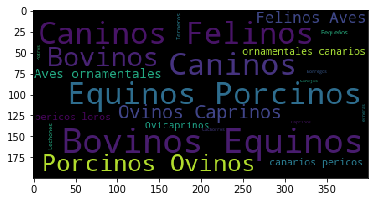

In [5]:
palabras = data.Especie.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [6]:
import re 


def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['PP'] = data.Especie.apply(lambda texto: pre_procesado(texto))

data.head()

,Descripción producto,Clase,Presentación,Especie,PP
0,AFTOGAN 2 ML,VACUNA,"Frascos por 10, 25 y 50 dosis.",Bovinos,bovinos
1,AFTOGAN RABIA 2ML,VACUNA,"Frascos por 10, 25 y 50 dosis",Bovinos,bovinos
2,ESTOMATITIS,VACUNA,"Frascos por 10, 20 y 50 dosis",Bovinos,bovinos
3,VACUNA TRIPLE HA,VACUNA,Frascos por 20 y 50 dosis,Bovinos,bovinos
4,VACUNA TRIPLE HA,VACUNA,Frascos por 20 y 50 dosis,Ovinos,ovinos


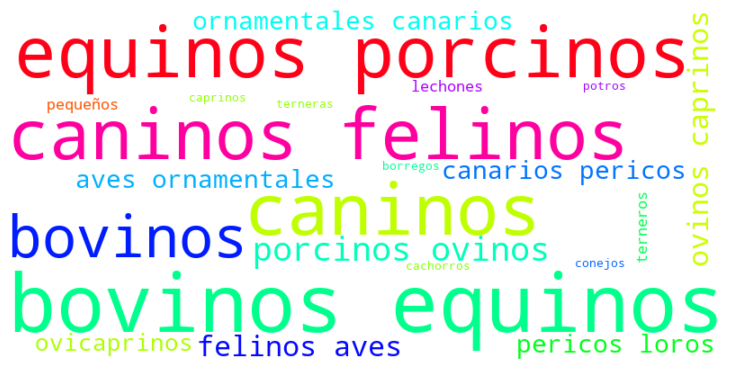

In [14]:
palabras = data.PP.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="hsv",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

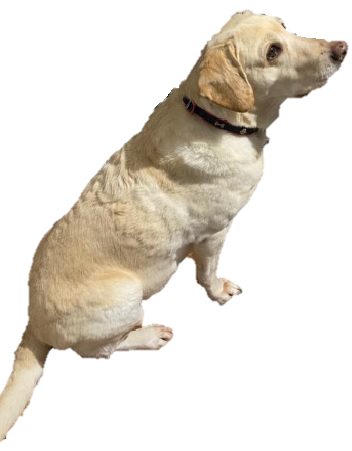

In [10]:
img = PIL.Image.open("luna.png")
display(img)

In [12]:
mask = np.array(img)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

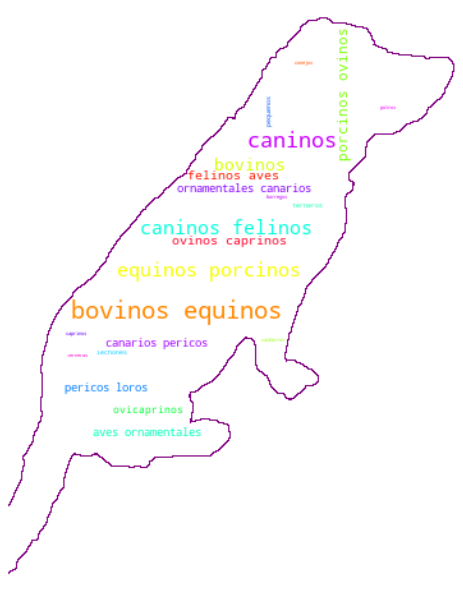

In [15]:
palabras = data.PP.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="hsv",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='purple').generate(palabras) 

wordcloud.to_file("luna.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

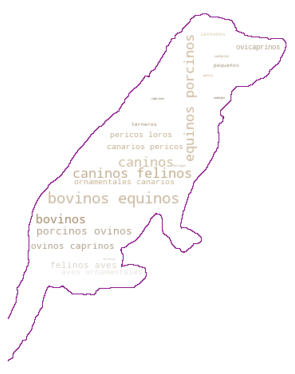

In [16]:
palabras = data.PP.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=150,
                      background_color="white", colormap="hsv",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='purple').generate(palabras) 

image_colors=ImageColorGenerator(mask)

wordcloud.to_file("luna.jpg")

plt.figure(figsize=(6,5))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()